# Topic extraction and Logistic Regression of employees' company

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# for LDA and topic extraction
from time import time
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

import numpy as np

In [2]:
# Input data
df=pd.read_csv("train.csv")
df.head()
df.shape

(30336, 17)

In [3]:
df_clean=df.drop(['ID','location','date','status','job_title','advice_to_mgmt','score_1','score_2','score_3','score_4','score_5','score_6','overall'],axis=1)

df_clean.head()

df_clean=df_clean.dropna()
check_nan = df_clean['summary'].isnull().any()
print(check_nan)
count_nan=df_clean['summary'].isnull().sum()
print(count_nan)

False
0


In [4]:
df_clean['Place'].value_counts()

startup_4    11742
startup_6     8163
startup_2     5850
startup_1     3461
startup_5      694
startup_3      374
Name: Place, dtype: int64

In [5]:
df4=    df_clean[df_clean['Place']=='startup_4']
df1=    df_clean[df_clean['Place']=='startup_1']
df2=    df_clean[df_clean['Place']=='startup_2']
df3=    df_clean[df_clean['Place']=='startup_3']
df5=    df_clean[df_clean['Place']=='startup_5']
df6=    df_clean[df_clean['Place']=='startup_6']

In [6]:
no_of_row=2000
df1_temp=df1[:no_of_row]
df2_temp=df2[:no_of_row]
df4_temp=df4[:no_of_row]
df6_temp=df6[:no_of_row]

In [7]:
frames=[df1_temp,df2_temp,df4_temp,df6_temp]
df_clean=pd.concat(frames)


In [8]:
df_clean.shape

(8000, 4)

In [9]:
positives=df_clean['positives'].values.tolist() # list to extract topic
negatives=df_clean['negatives'].values.tolist() # list to extract topic 
summary=df_clean['summary'].values.tolist() # list to extract topic
place=df_clean['Place'].values.tolist()

In [10]:
# LDA and topic extraction
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 10

In [11]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    features=[]
    features_list=[]
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        
        print(top_features)
        features.append(top_features)
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

    for list in features:
        for x in list:
            features_list.append(x) 

    print(features_list)

In [12]:
# Extract topic
def extract_topic(model, feature_names, n_top_words, title):

    features=[]
    features_list=[]
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        features.append(top_features)
        weights = topic[top_features_ind]


    for list in features:
        for x in list:
            features_list.append(x) 

    #print(features_list)
    return features_list

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1, #min_df=2
                                   max_features=n_features,
                                   stop_words='english')
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1, #min_df=2
                                max_features=n_features,
                                stop_words='english')


In [14]:
individual=[positives[1],negatives[1],summary[1]] 
tf = tf_vectorizer.fit_transform(individual)
tfidf = tfidf_vectorizer.fit_transform(individual)
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

['work', 'people', 'colleagues', 'google', 'management', 'actually', 'don', 'know', 'getting', 'intelligence']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
['years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']


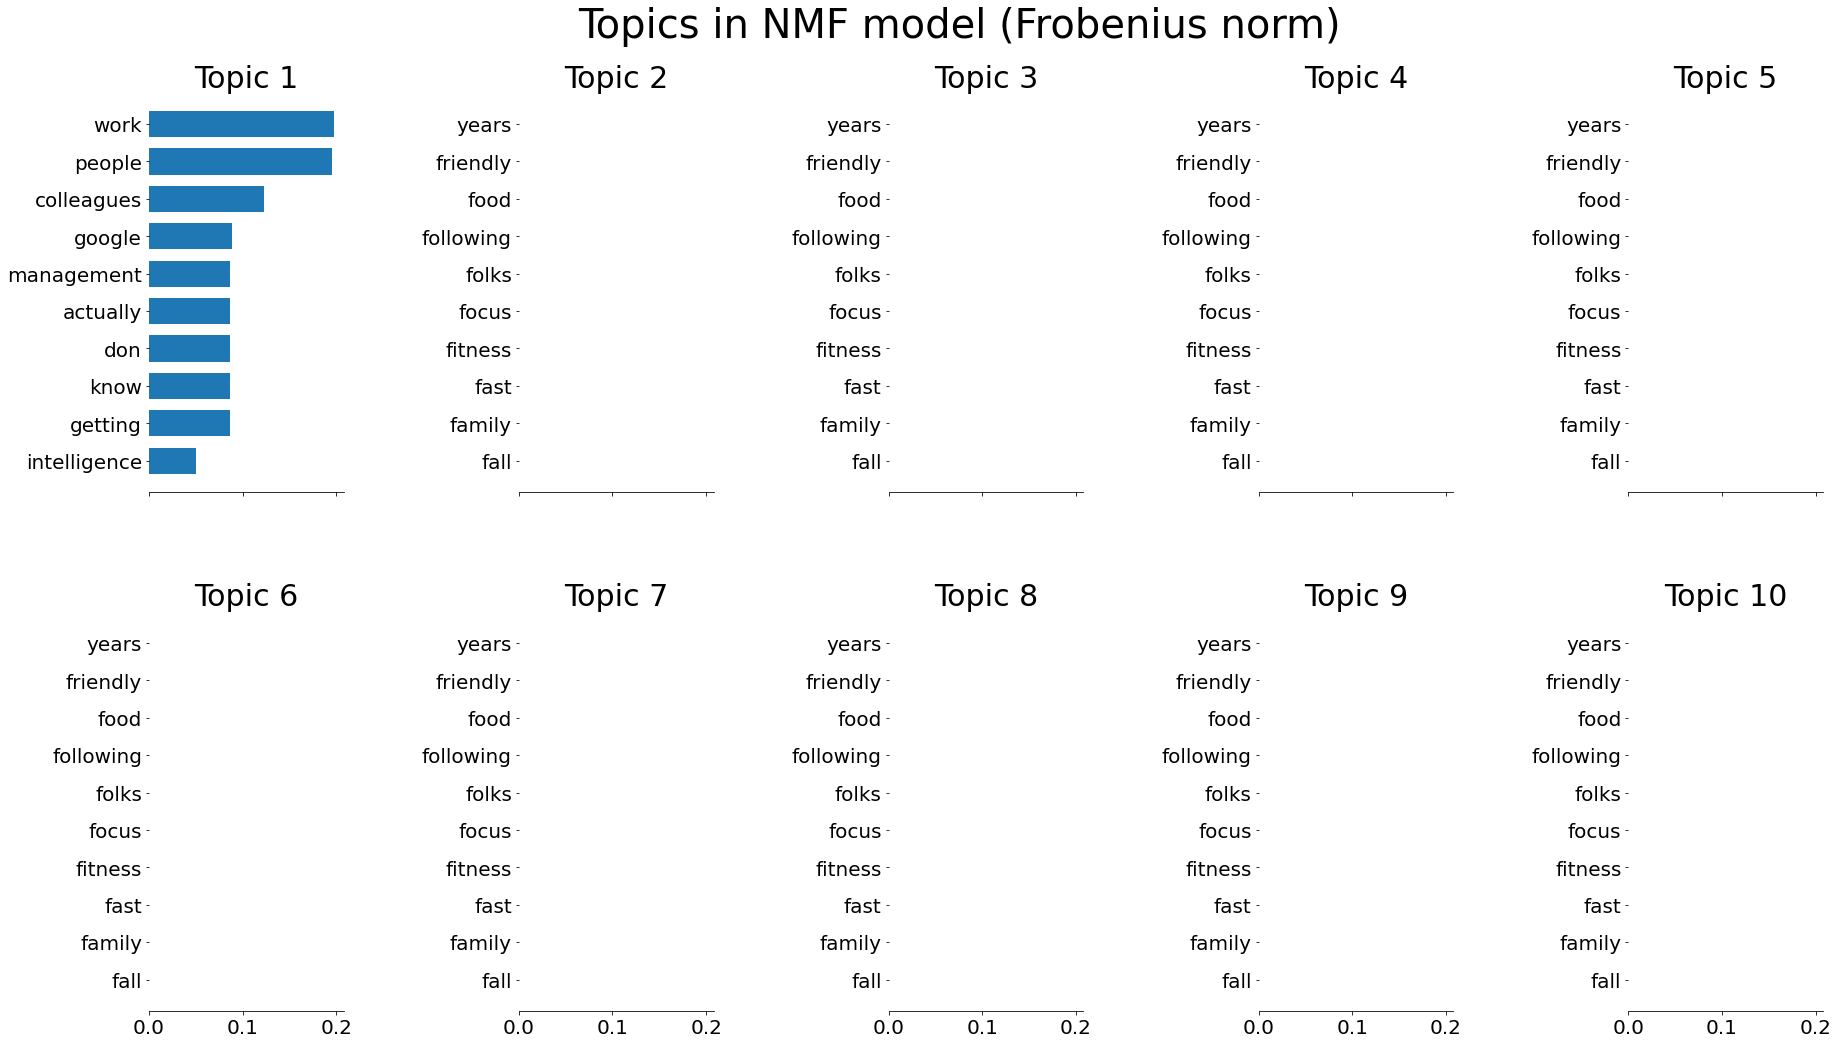

['work', 'people', 'colleagues', 'google', 'management', 'actually', 'don', 'know', 'getting', 'intelligence', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']


In [15]:
# Plotting topic with graph
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

In [16]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
result=extract_topic(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

In [17]:
topic_unique=[]
for x in result:
    if x not in topic_unique:
        topic_unique.append(x)
print(topic_unique)

['work', 'people', 'colleagues', 'google', 'management', 'actually', 'don', 'know', 'getting', 'intelligence', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']


In [18]:
def unique(result):
    topic_unique=[]
    for x in result:
        if x not in topic_unique:
            topic_unique.append(x)
    return topic_unique

In [19]:
review=[]
for x in range(4*no_of_row):
    #print(positives[x])
    #print(negatives[x])
    #print(summary[x])
    #print(place[x])
    
    if (positives[x] != np.nan and negatives[x]!=np.nan and summary[x]!=np.nan):
        row=[positives[x],negatives[x],summary[x]] 
        tfidf = tfidf_vectorizer.fit_transform(row)
        nmf = NMF(n_components=n_components, random_state=1,
            alpha=.1, l1_ratio=.5).fit(tfidf)
        tfidf_feature_names = tfidf_vectorizer.get_feature_names()
        result=extract_topic(nmf, tfidf_feature_names, n_top_words,
            'Topics in NMF model (Frobenius norm)')
        unique_result= unique(result)
        print(unique_result)
        review.append(unique_result)
        print("=====")

['work', 'things', 'smart', 'slowing', 'people', 'friendly', 'company', 'bureaucracy', 'best']
=====
['work', 'people', 'colleagues', 'google', 'management', 'actually', 'don', 'know', 'getting', 'intelligence', 'years', 'friendly', 'food', 'following', 'folks', 'focus', 'fitness', 'fast', 'family', 'fall']
=====
['work', 'advance', 'just', 'google', 'code', 'coding', 'll', 'engineer', 'want', 'lead', 'yes', 'game', 'focused', 'food', 'forum', 'free', 'frequently', 'fun', 'general', 'fine']
=====
['work', 'll', 'company', 'people', 'google', 'don', 'campus', 'day', 'like', 'time', 'yo', 'gyms', 'goofy', 'going', 'gets', 'functional', 'fro', 'free', 'fool', 'best', 'worked', 'place', 've', 'demanding']
=====
['execellent', 'engineers', 'world', 'tech', 'size', 'matters', 'impact', 'driven', 'disconnected', 'customers', 'bit', 'best']
=====
['work', 'review', 'people', 'lower', 'great', 'expected', 'compensation']
=====
['work', 'perks', 'people', 'great', 'good', 'wide', 'variety', 'tea

In [20]:
type(review)

list

In [21]:
summary[1]

'Moving at the speed of light, burn out is inevitable'

In [22]:
def listToString(s):
    str1=""
    for ele in s:
        str1 += ele + " "
    return str1

In [23]:
review[1]

['work',
 'people',
 'colleagues',
 'google',
 'management',
 'actually',
 'don',
 'know',
 'getting',
 'intelligence',
 'years',
 'friendly',
 'food',
 'following',
 'folks',
 'focus',
 'fitness',
 'fast',
 'family',
 'fall']

In [24]:
print(listToString(review[1]))

work people colleagues google management actually don know getting intelligence years friendly food following folks focus fitness fast family fall 


In [25]:
review_list=[]
for te in review:
    tempp=listToString(te)
    review_list.append(tempp)



In [26]:
review_list[1]

'work people colleagues google management actually don know getting intelligence years friendly food following folks focus fitness fast family fall '

In [27]:
type(review_list)

list

In [28]:
df_clean=df_clean.assign(review=review_list)

In [29]:
df_clean

,Place,summary,positives,negatives,review
0,startup_1,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,work things smart slowing people friendly comp...
1,startup_1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,work people colleagues google management actua...
2,startup_1,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",work advance just google code coding ll engine...
3,startup_1,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,work ll company people google don campus day l...
4,startup_1,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,execellent engineers world tech size matters i...
...,...,...,...,...,...
24161,startup_6,Principal Group Manager,Opportunity to work in different types of busi...,Can be very MICROSOFT centric biased towards p...,work types product principal opportunity micro...
24162,startup_6,Tech Specialist,"Great place to work, great benefits. Mostly in...",Implemented crazy performance review system th...,working level balance benefits clawing conduci...
24163,startup_6,Big Company In Need of Better Tools for Agility,Great Benefits! Like seriously top class benef...,"Depending on the team, some of the tools you u...",team 20 multiple example excess google use dea...
24164,startup_6,Software Engineer,Amazing perks and smart coworkers,Older culture than some younger companies in s...,smart perks coworkers amazing younger teams so...


In [30]:
df_clean.shape

(8000, 5)

In [31]:
df_clean['Place'].unique()

array(['startup_1', 'startup_2', 'startup_4', 'startup_6'], dtype=object)

In [32]:
df_clean

,Place,summary,positives,negatives,review
0,startup_1,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,work things smart slowing people friendly comp...
1,startup_1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,work people colleagues google management actua...
2,startup_1,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",work advance just google code coding ll engine...
3,startup_1,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,work ll company people google don campus day l...
4,startup_1,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,execellent engineers world tech size matters i...
...,...,...,...,...,...
24161,startup_6,Principal Group Manager,Opportunity to work in different types of busi...,Can be very MICROSOFT centric biased towards p...,work types product principal opportunity micro...
24162,startup_6,Tech Specialist,"Great place to work, great benefits. Mostly in...",Implemented crazy performance review system th...,working level balance benefits clawing conduci...
24163,startup_6,Big Company In Need of Better Tools for Agility,Great Benefits! Like seriously top class benef...,"Depending on the team, some of the tools you u...",team 20 multiple example excess google use dea...
24164,startup_6,Software Engineer,Amazing perks and smart coworkers,Older culture than some younger companies in s...,smart perks coworkers amazing younger teams so...


In [33]:
df_clean=df_clean.replace("startup_1",1)
df_clean=df_clean.replace("startup_2",2)
df_clean=df_clean.replace("startup_4",4)
df_clean=df_clean.replace("startup_6",6)

In [34]:
df_clean

,Place,summary,positives,negatives,review
0,1,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,work things smart slowing people friendly comp...
1,1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,work people colleagues google management actua...
2,1,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",work advance just google code coding ll engine...
3,1,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,work ll company people google don campus day l...
4,1,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,execellent engineers world tech size matters i...
...,...,...,...,...,...
24161,6,Principal Group Manager,Opportunity to work in different types of busi...,Can be very MICROSOFT centric biased towards p...,work types product principal opportunity micro...
24162,6,Tech Specialist,"Great place to work, great benefits. Mostly in...",Implemented crazy performance review system th...,working level balance benefits clawing conduci...
24163,6,Big Company In Need of Better Tools for Agility,Great Benefits! Like seriously top class benef...,"Depending on the team, some of the tools you u...",team 20 multiple example excess google use dea...
24164,6,Software Engineer,Amazing perks and smart coworkers,Older culture than some younger companies in s...,smart perks coworkers amazing younger teams so...


In [35]:
df_clean['Place'].unique()

array([1, 2, 4, 6], dtype=int64)

In [36]:
df_clean.review

0        work things smart slowing people friendly comp...
1        work people colleagues google management actua...
2        work advance just google code coding ll engine...
3        work ll company people google don campus day l...
4        execellent engineers world tech size matters i...
                               ...                        
24161    work types product principal opportunity micro...
24162    working level balance benefits clawing conduci...
24163    team 20 multiple example excess google use dea...
24164    smart perks coworkers amazing younger teams so...
24165    hard maybe face happen salary possobility cutt...
Name: review, Length: 8000, dtype: object

In [37]:
vectorizer=TfidfVectorizer(max_features=1500)
vectors=vectorizer.fit_transform(df_clean.review)
word_df=pd.DataFrame(vectors.toarray(),columns=vectorizer.get_feature_names())
word_df.head()

,10,100,12,15,20,24,30,40,401k,50,...,wrong,xbox,year,yearly,years,yes,young,younger,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.194411,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.300192,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [38]:
word_df.shape

(8000, 1500)

In [39]:
X=word_df
y=df_clean.Place

In [40]:
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=10000) # C=1e9 max_iter=1000
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, max_iter=10000)

# Testing

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33, random_state=12)

In [42]:
# logistic regression model
logreg1 = LogisticRegression(C=1e9, solver='lbfgs', max_iter=10000)
logreg1.fit(X_train, y_train)
svc1=LinearSVC()
svc1.fit(X_train,y_train)

LinearSVC()

In [43]:
# SVC
svc=SVC(kernel="rbf")
svc.fit(X_train,y_train)


SVC()

In [44]:
y_pred_svc=svc.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib as plt
cm= confusion_matrix(y_test,y_pred_svc)
print(cm)

[[438  38  52  97]
 [ 78 458  67  68]
 [ 59  43 482  83]
 [100  51  61 465]]


In [46]:
438+458+482+465

1843

In [47]:
38+52+97+67+68+83+78+59+43+100+51+61

797

In [48]:
1843/(1843+797)

0.6981060606060606

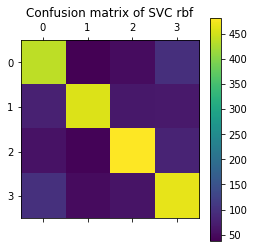

In [49]:
import pylab as pl 
pl.matshow(cm)
pl.title('Confusion matrix of SVC rbf')
pl.colorbar()
pl.show()

In [50]:
y_pred= logreg1.predict(X_test)
y_pred2=svc1.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib as plt
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[377  67  56 125]
 [ 92 420  74  85]
 [ 62  82 427  96]
 [129  91  85 372]]


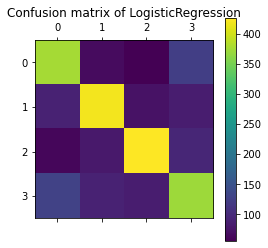

In [52]:
import pylab as pl 
pl.matshow(cm)
pl.title('Confusion matrix of LogisticRegression')
pl.colorbar()
pl.show()

In [53]:
377+420+427+372

1596

In [54]:
67+56+125+74+85+96+92+62+82+129+91+85

1044

In [55]:
1596/(1596+1044)

0.6045454545454545

In [56]:
cm_svc= confusion_matrix(y_test,y_pred2)
print(cm_svc)

[[427  47  59  92]
 [ 79 464  61  67]
 [ 56  52 487  72]
 [109  68  67 433]]


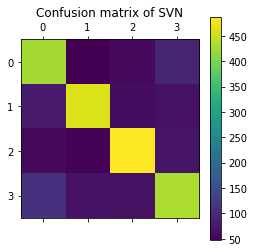

In [57]:
import pylab as pl 
pl.matshow(cm_svc)
pl.title('Confusion matrix of SVN')
pl.colorbar()
pl.show()

In [58]:
pl.noncentral_f

<function RandomState.noncentral_f>

In [59]:
aa=427+464+487+433

In [60]:
bb=47+59+92+61+67+72+79+56+52+109+68+67

In [61]:
aa/(aa+bb)

0.6859848484848485